## ANOVA

In [14]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [7]:
treatment = pd.read_csv('../datasets/anova.csv', sep = ";");
treatment.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


#### Boxplot

AxesSubplot(0.1,0.15;0.8x0.75)


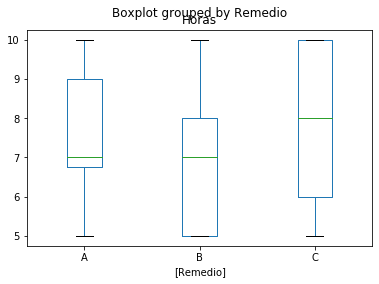

In [9]:
print(treatment.boxplot(by = 'Remedio', grid = False))

### ANOVA Model

In [11]:
model = ols('Horas ~ Remedio', data = treatment).fit()
results = sm.stats.anova_lm(model)
print(results)

            df     sum_sq   mean_sq         F    PR(>F)
Remedio    2.0   4.083333  2.041667  0.537618  0.591966
Residual  21.0  79.750000  3.797619       NaN       NaN


In [13]:
model_two_attr = ols('Horas ~ Remedio * Sexo', data = treatment).fit()
results_two = sm.stats.anova_lm(model_two_attr)
print(results_two)

                df     sum_sq   mean_sq         F    PR(>F)
Remedio        2.0   4.083333  2.041667  0.532609  0.596042
Sexo           1.0   4.166667  4.166667  1.086957  0.310948
Remedio:Sexo   2.0   6.583333  3.291667  0.858696  0.440360
Residual      18.0  69.000000  3.833333       NaN       NaN


#### Tukey Test

In [16]:
mc = MultiComparison(treatment['Horas'], treatment['Remedio'])
result_test = mc.tukeyhsd()
print(result_test)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


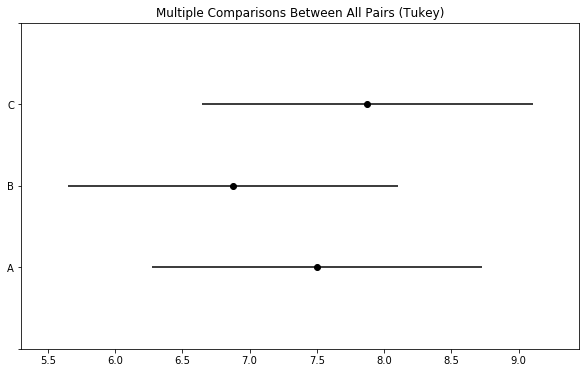

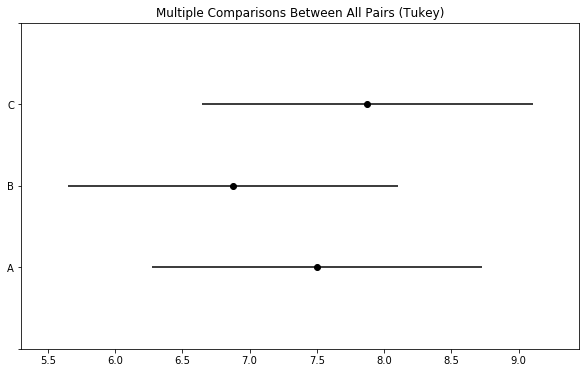

In [17]:
result_test.plot_simultaneous()